Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### 1 Importing all the important libraries

In [62]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [63]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [92]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_path="gdrive/MyDrive/kaggle/cancer/train/Train/"
test_path="gdrive/MyDrive/kaggle/cancer/test/Test/"
#data_dir_train = pathlib.Path(train_path)
#data_dir_test = pathlib.Path(test_path)
data_dir_train = pathlib.Path("gdrive/MyDrive/kaggle/cancer/train/Train/")
data_dir_test = pathlib.Path("gdrive/MyDrive/kaggle/cancer/test/Test/")

In [65]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### 2 Dataset creation

Define some parameters for the loader:

In [66]:
batch_size = 32
img_height = 180
img_width = 180

###2.1 Train data set creation

Use 80% of the images for training, and 20% for validation.

In [67]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


###2.2 Validation dataset creation

In [68]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [69]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3 Visualizing the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

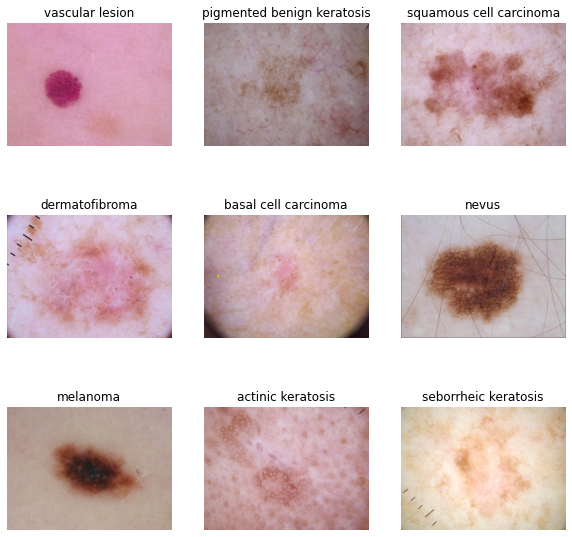

In [70]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
num=0
for dirpath, dirnames, filenames in os.walk(str("gdrive/MyDrive/kaggle/cancer/train/Train")):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [71]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 4 Model buidlign and training
Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

###4.1 Creating the model

In [72]:
### Your code goes here
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 4.2 Compile the model
Choose an appropirate optimiser and loss function for model training 

In [73]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
#model.summary() #this command threw error since, This model has not yet been built.

### 4.3 Train the model

In [74]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 94ms/step - loss: 2.5935 - accuracy: 0.1875 - val_loss: 2.0347 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.9386 - accuracy: 0.2729 - val_loss: 1.7610 - val_accuracy: 0.3624
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6679 - accuracy: 0.4174 - val_loss: 1.6422 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.5969 - accuracy: 0.4342 - val_loss: 1.5360 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4547 - accuracy: 0.4911 - val_loss: 1.4816 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3514 - accuracy: 0.5368 - val_loss: 1.4406 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3229 - accuracy: 0.5324 - val_loss: 1.5847 - val_accuracy: 0.4474
Epoch 8/20
5

### 4.4 Visualizing training results

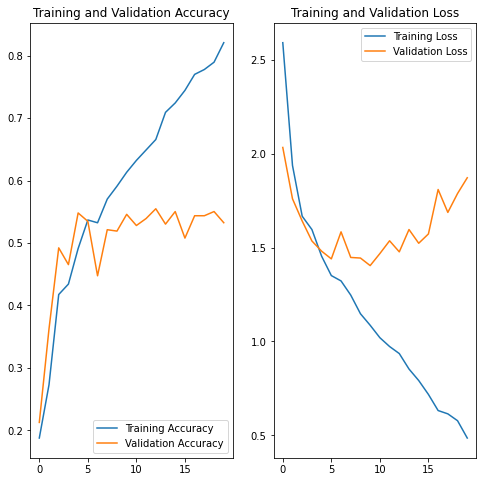

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Observations: The accuracy in trainig set for all the epochs are more than the accuracy in validation sets. This model has the **tendency of overfitting** and its evident that class imbalances present in the provided data set. **Adding dropout layers and remove the batch normalizations** layers would help to improve the model.

## 5 Creating and traing the model with dropout layers


###5.1 Creating the model

In [77]:
### creating the model
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### 5.2 Compiling the model

In [78]:
# Compiling the model
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

###5.3 Traning the model

In [79]:
# Traning the model
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 96ms/step - loss: 2.1688 - accuracy: 0.2015 - val_loss: 2.0536 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0344 - accuracy: 0.2154 - val_loss: 2.0278 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0322 - accuracy: 0.1959 - val_loss: 2.0229 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 2.0266 - accuracy: 0.2048 - val_loss: 2.0222 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0038 - accuracy: 0.2081 - val_loss: 1.9616 - val_accuracy: 0.2349
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 1.9359 - accuracy: 0.2734 - val_loss: 1.8954 - val_accuracy: 0.2327
Epoch 7/20
56/56 [==============================] - 5s 91ms/step - loss: 1.8569 - accuracy: 0.2946 - val_loss: 2.0482 - val_accuracy: 0.2304
Epoch 8/20
56

In [80]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

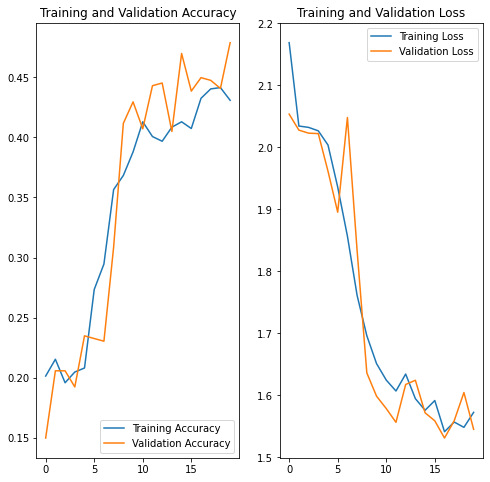

In [81]:
# Visualizing the trainig results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations: **accuaracy has been decreased**. but both **traning and validation accuracies are almost similar**. but slight increment in validation data.**No overfit of the model is observed**.Data Augmentation helps to improve the accuracy of the model

## 6 Data Augmentation

In [82]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

<Figure size 864x864 with 0 Axes>

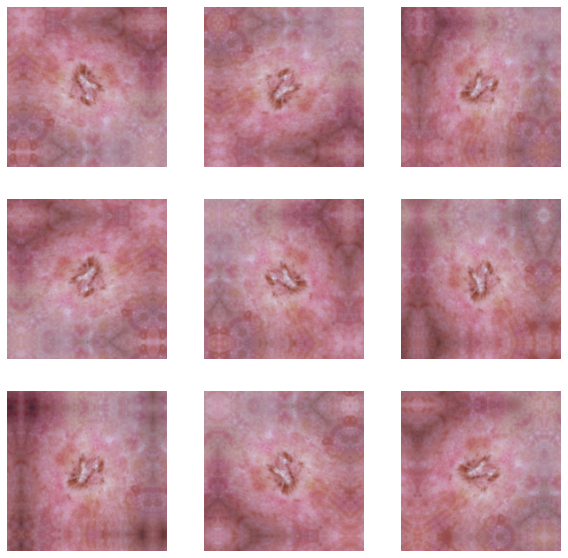

In [83]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_aug(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### 7 Creating and training the model having augmented data

###7.1 Creating the model

In [84]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_aug,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])



###7.2 Compiling the model

In [85]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

###7.3 Training the model

In [86]:
## Your code goes here, note: train your model for 20 epochs
## your training code
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 42ms/step - loss: 0.5071 - accuracy: 0.8198 - val_loss: 1.9580 - val_accuracy: 0.5391
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 0.3926 - accuracy: 0.8510 - val_loss: 2.1469 - val_accuracy: 0.5526
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 0.4182 - accuracy: 0.8471 - val_loss: 2.5113 - val_accuracy: 0.5347
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 0.3310 - accuracy: 0.8750 - val_loss: 2.3278 - val_accuracy: 0.5503
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 0.3108 - accuracy: 0.8694 - val_loss: 2.2493 - val_accuracy: 0.5638
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 0.3285 - accuracy: 0.8650 - val_loss: 2.4484 - val_accuracy: 0.5570
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 0.3137 - accuracy: 0.8856 - val_loss: 2.8260 - val_accuracy: 0.5459
Epoch 8/20
56

###7.4 Visualizing the results

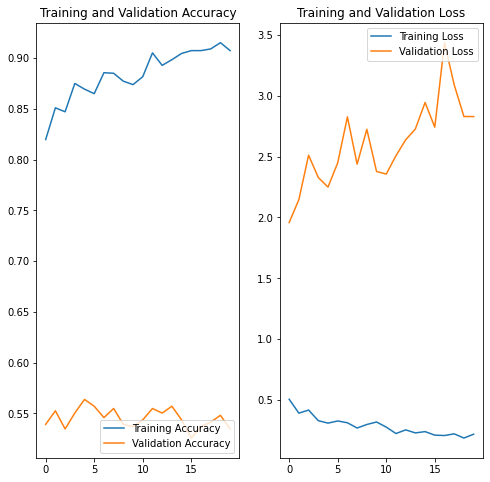

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Observations: The model accuracy of training set **is higher than validation accuracy of validation set**.The trainig set accuracy is improved to 90%.With data augmentation the model performance has reduced with a sign of overfit. Lets deal with the class imbalance.**
 

####8 Checking for class imbalance. 
Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [93]:
for i in class_names:
    directory =train_path+i+'/'
    #print (f'dir= {directory}')
    class_directory = pathlib.Path(directory)
    #print (f'cd= {class_directory}')
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


###9 Rectify the class imbalance using Augmentor
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [94]:
!pip install Augmentor
#installing augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


###9.1 Using augmentor

In [95]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8597ED3190>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8597EDDF50>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8597C590D0>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8597C4FB50>: 100%|██████████| 500/500 [01:40<00:00,  4.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8596112710>: 100%|██████████| 500/500 [01:22<00:00,  6.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8636FD18D0>: 100%|██████████| 500/500 [00:18<00:00, 27.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F8597C45710>: 100%|██████████| 500/500 [00:42<00:00, 11.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8636FFC990>: 100%|██████████| 500/500 [00:18<00:00, 26.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8596244510>: 100%|██████████| 500/500 [00:18<00:00, 26.35 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [96]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [97]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0029889.jpg_53d57889-e960-43e8-8ee2-f9fb558b140d.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0030956.jpg_4faa9ca0-c40b-4f8d-a504-8dc64df1546d.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0031201.jpg_f89952d9-a6d5-46fd-a61c-42d36afd3e6b.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0031103.jpg_9d1d7172-18fb-4244-89be-ffa52f30b29f.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0033230.jpg_c1edea9d-e4ee-464f-b4f9-71d59002171c.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISIC_0029439.jpg_5eac0d47-5367-4cf4-bd88-807ddaf78307.jpg',
 'gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output/vascular lesion_original_ISI

In [98]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [100]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [104]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


####The Augmentor has **helped decrease the imbalance** in class images and that can be viewed from above.

####10 Modeling, Creating and training the model for the data created using Augmentor

In [105]:
batch_size = 32
img_height = 180
img_width = 180

#### 10.1 Create a training dataset

In [106]:
#data after augmentation
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### 10.2 Create a validation dataset

In [108]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### 10.3 Create your model (make sure to include normalization)

In [109]:
## your code goes here
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

###10.4 Compile your model (Choose optimizer and loss function appropriately)

In [110]:
## your code goes here
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

####10.5 Train your model

In [111]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 185ms/step - loss: 2.3965 - accuracy: 0.2728 - val_loss: 1.7184 - val_accuracy: 0.3556
Epoch 2/30
169/169 [==============================] - 32s 185ms/step - loss: 1.5230 - accuracy: 0.4366 - val_loss: 1.4163 - val_accuracy: 0.4499
Epoch 3/30
169/169 [==============================] - 31s 178ms/step - loss: 1.3552 - accuracy: 0.4894 - val_loss: 1.3102 - val_accuracy: 0.4996
Epoch 4/30
169/169 [==============================] - 31s 179ms/step - loss: 1.2090 - accuracy: 0.5510 - val_loss: 1.1737 - val_accuracy: 0.5657
Epoch 5/30
169/169 [==============================] - 31s 178ms/step - loss: 1.0604 - accuracy: 0.6174 - val_loss: 1.0651 - val_accuracy: 0.6154
Epoch 6/30
169/169 [==============================] - 31s 178ms/step - loss: 0.9597 - accuracy: 0.6445 - val_loss: 1.1325 - val_accuracy: 0.5961
Epoch 7/30
169/169 [==============================] - 31s 178ms/step - loss: 0.8182 - accuracy: 0.7066 - val_loss: 0.9749 - val_ac

####10.6 Visualize the model results

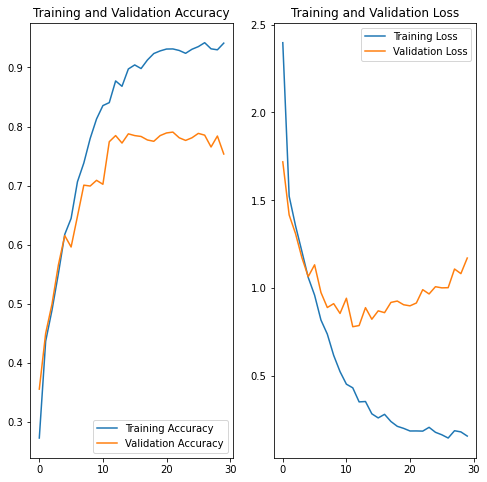

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations: Class rebalance helped to some extent to treat the overfitting. Improving number of layers and more epochs may help to have a better model. 

